# 주식과 가상화폐의 상관관계

##### 필요한 패키지 사전 설치 

Dependencies

``` cmd
pip install yfinance pandas-datareader mplfinance

```


## 1. 데이터 수집

### 네이버 금융 코스피 지수 크롤링

In [62]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd

In [72]:
# 맨 뒤 페이지 숫자
url = "https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI"
with urlopen(url) as doc:
    html = BeautifulSoup(doc,"lxml")
    pgrr = html.find("td", class_="pgRR")
    last_page_num = pgrr.a["href"].split("=")[-1]
    
kospi = pd.DataFrame()
for i in range(1,int(last_page_num)+1):
    page_url = "{}&page={}".format(url,i)
    kospi = kospi.append(pd.read_html(page_url, header=0)[0])
                   
kospi = kospi.dropna()    
kospi["날짜"] = pd.to_datetime(kospi["날짜"])
kospi = kospi.set_index("날짜")

### Yahoo Finance S&P500 지수 크롤링

In [16]:
import yfinance as yf
from pandas_datareader import data as pdr

In [18]:
yf.pdr_override()
SP_500 = pdr.get_data_yahoo("^GSPC", start="1990-01-01")

[*********************100%***********************]  1 of 1 completed


In [19]:
SP_500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000
1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000
...,...,...,...,...,...,...
2022-04-08,4494.149902,4520.410156,4474.600098,4488.279785,4488.279785,3453040000
2022-04-11,4462.640137,4464.350098,4408.379883,4412.529785,4412.529785,3452540000
2022-04-12,4437.589844,4471.000000,4381.339844,4397.450195,4397.450195,3451990000


### 비트코인 시세 크롤링

In [20]:
BTC = pdr.get_data_yahoo("BTC-USD", start="1990-01-01")

[*********************100%***********************]  1 of 1 completed


In [21]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-04-11,42201.039062,42424.589844,39373.058594,39521.902344,39521.902344,33949912166
2022-04-12,39533.714844,40617.585938,39388.328125,40127.183594,40127.183594,30991500854
2022-04-13,40123.570312,41430.054688,39712.746094,41166.730469,41166.730469,27691105228


### 이더리움 시세 크롤링

In [22]:
ETH = pdr.get_data_yahoo("ETH-USD", start="1990-01-01")

[*********************100%***********************]  1 of 1 completed


In [23]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2022-04-11,3209.576904,3214.461914,2962.756592,2981.052246,2981.052246,21891804831
2022-04-12,2981.420654,3077.452637,2957.872314,3030.376465,3030.376465,20235707410
2022-04-13,3029.877930,3123.575439,3006.481689,3118.344238,3118.344238,16088473629


## 2. 시각화

In [46]:
import mplfinance as mpf
import matplotlib.pyplot as plt
import seaborn as sns

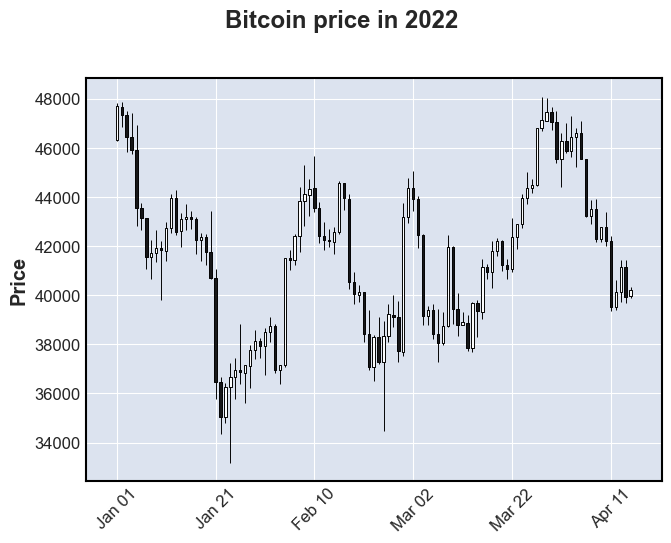

In [130]:
mpf.plot(BTC["2022-01-01":], title="Bitcoin price in 2022", type="candle")

#### KOSPI vs S&P500 비교

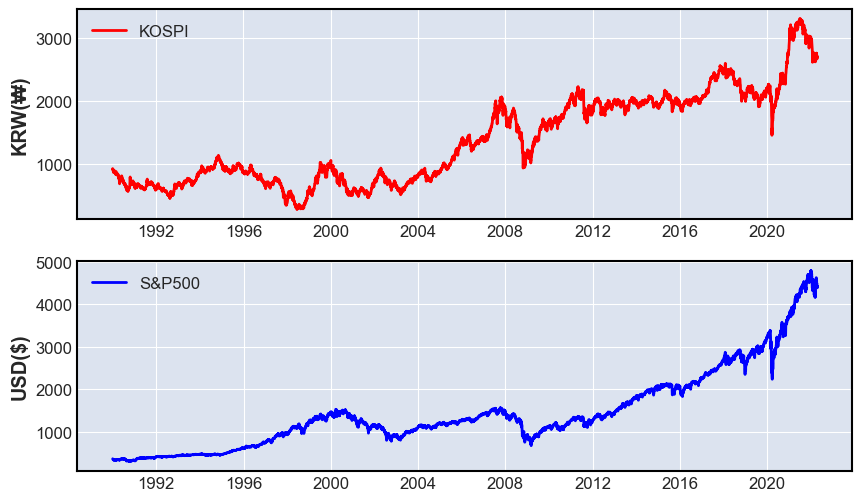

In [128]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(kospi.index, kospi["체결가"],"r", label="KOSPI")
plt.legend(loc="best")
plt.ylabel("KRW(₩)")
plt.subplot(2,1,2)
plt.plot(SP_500.index, SP_500["Close"],"b", label="S&P500")
plt.legend(loc="best")
plt.ylabel("USD($)")
plt.show()

#### 비트코인 vs 이더리움 가격 비교

In [121]:
adj_ETH = pd.DataFrame(columns=ETH.columns, index=BTC[:"2017-11-08"].index, data=0).append(ETH)

In [122]:
adj_ETH

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,0.000000,0.000000,0.000000,0.000000,0.000000,0
2014-09-18,0.000000,0.000000,0.000000,0.000000,0.000000,0
2014-09-19,0.000000,0.000000,0.000000,0.000000,0.000000,0
2014-09-20,0.000000,0.000000,0.000000,0.000000,0.000000,0
2014-09-21,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...
2022-04-11,3209.576904,3214.461914,2962.756592,2981.052246,2981.052246,21891804831
2022-04-12,2981.420654,3077.452637,2957.872314,3030.376465,3030.376465,20235707410
2022-04-13,3029.877930,3123.575439,3006.481689,3118.344238,3118.344238,16088473629


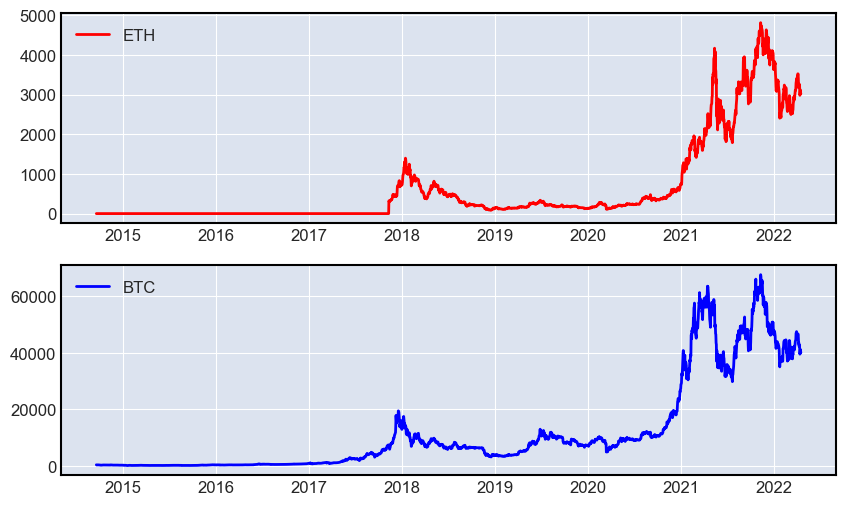

In [127]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(adj_ETH.index, adj_ETH["Close"],"r", label="ETH")
plt.legend(loc="upper left")
plt.subplot(2,1,2)
plt.plot(BTC.index, BTC["Close"],"b", label="BTC")
plt.legend(loc="upper left")

#### S&P 500 vs 비트코인 가격 비교 (전체 데이터)

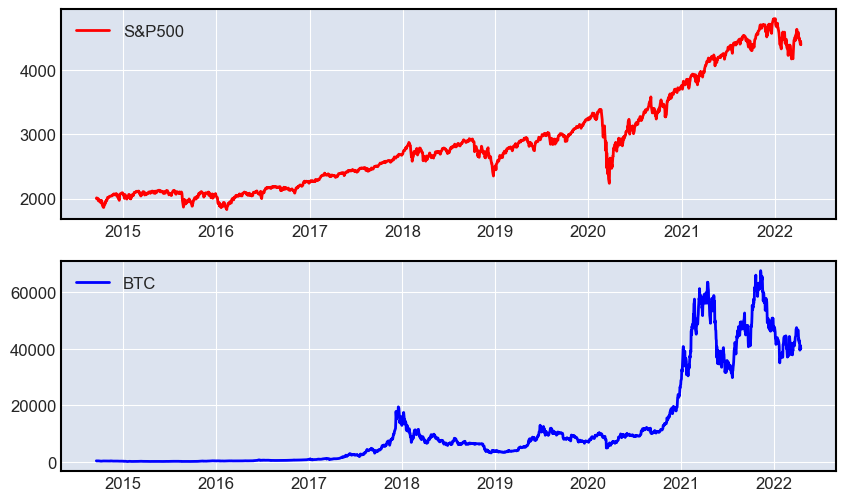

In [132]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(SP_500["2014-09-17":].index, SP_500["2014-09-17":]["Close"],"r", label="S&P500")
plt.legend(loc="upper left")
plt.subplot(2,1,2)
plt.plot(BTC.index, BTC["Close"],"b", label="BTC")
plt.legend(loc="upper left")

#### S&P 500 vs 비트코인 가격 비교 (최근 3년)

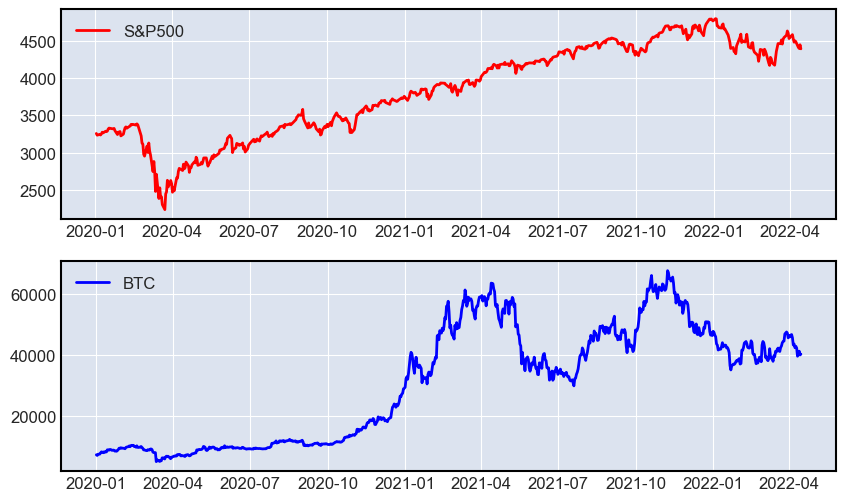

In [133]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(SP_500["2020-01-01":].index, SP_500["2020-01-01":]["Close"],"r", label="S&P500")
plt.legend(loc="upper left")
plt.subplot(2,1,2)
plt.plot(BTC["2020-01-01":].index, BTC["2020-01-01":]["Close"],"b", label="BTC")
plt.legend(loc="upper left")